# Imports

In [1]:
!pip install -q biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 22.4 MB/s eta 0:00:00


In [2]:
from Bio import SeqIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the FASTA and GFF3 Files
Here's a sample Python code to read the FASTA and GFF3 files and preprocess the data:

In [ ]:
# I didn't work on zip file that contains a lot of files (To-Do work)
import zipfile
import os

# Define the path to the ZIP file and the extraction directory
zip_file_path = '/content/Genomic/genomes.zip'
extraction_dir = '/content/Genomic/extracted_genomes/'

# Create the extraction directory if it doesn't exist
os.makedirs(extraction_dir, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

print(f"Extracted files to: {extraction_dir}")

Extracted files to: /content/Genomic/extracted_genomes/


In [3]:
# Step 1: Read the FASTA file
def read_fasta(file_path):
    sequences = {}
    for record in SeqIO.parse(file_path, "fasta"):
        sequences[record.id] = str(record.seq)
    return sequences

# Step 2: Read the GFF3 file
def read_gff3(file_path):
    gff_data = pd.read_csv(file_path, sep='\t', comment='#', header=None)
    gff_data.columns = ['seqid', 'source', 'type', 'start', 'end', 'score', 'strand', 'phase', 'attributes']
    return gff_data

# Step 3: Load the data
fasta_file_path = '/content/ergobibamus_cyprinoides_genome.fasta'
gff_file_path = '/content/ergobibamus_cyprinoides_labels.gff3'

sequences = read_fasta(fasta_file_path)
gff_data = read_gff3(gff_file_path)

# Print loaded data
print("FASTA Sequences:", sequences.keys())
print()
print("GFF Data:")
gff_data.head()

FASTA Sequences: dict_keys(['tig00000012', 'tig00000492', 'tig00000016', 'tig00000015', 'tig00000496', 'tig00000019', 'tig00000079', 'tig00000031', 'tig00000513', 'tig00000510', 'tig00000506', 'tig00000491', 'tig00000445', 'tig00000507', 'tig00000505', 'tig00000509', 'tig00000514', 'tig00000511', 'tig00000092', 'tig00000512', 'tig00000494', 'tig00000495', 'tig04970498'])

GFF Data:


,seqid,source,type,start,end,score,strand,phase,attributes
0,tig00000012,funannotate,gene,248937,250175,.,+,.,ID=PYV62_000001;Name=PIN8;
1,tig00000012,funannotate,mRNA,248937,250175,.,+,.,ID=PYV62_000001-T1;Parent=PYV62_000001;product...
2,tig00000012,funannotate,exon,248937,250175,.,+,.,ID=PYV62_000001-T1.exon1;Parent=PYV62_000001-T1;
3,tig00000012,funannotate,CDS,248937,250175,.,+,0,ID=PYV62_000001-T1.cds;Parent=PYV62_000001-T1;
4,tig00000012,funannotate,gene,250243,250896,.,+,.,ID=PYV62_000002;


# GFF3 Format Columns
GFF3 files have a **specific structure** and are typically composed of the following nine columns:

- **seqid**: The ID of the sequence (e.g. chromosome, scaffold) on which the feature is located.
- **source**: The source of the feature (e.g. a particular program that predicted this feature).
- **type**: The type of the feature (e.g. gene, mRNA, exon, etc.).
- start: The starting position of the feature in the sequence (1-based).
- end: The ending position of the feature in the sequence (1-based).
- score: A score representing the significance of the feature (this can be a numeric value, or '.' if not applicable).
- strand: The strand on which the feature is located ('+' for plus strand, '-' for minus strand, and '.' for if unknown).
- phase: The phase of the feature for coding sequences (can be 0, 1, 2, or '.' for not applicable).
- attributes: A semicolon-separated list of additional attributes (e.g., ID, Name, etc.) related to the feature.

# Why These Columns?
**Standardization**: These columns are internationally recognized and standardized for genomic annotations, allowing for easy sharing and integration of data across different software tools and databases.

 ## Example: Access a specific sequence by its ID

In [4]:
# Get first sequence ID
sequence_id = list(sequences.keys())[0]
print(f"Sequence {sequence_id}")
print()
sequences[sequence_id]

Output hidden; open in https://colab.research.google.com to view.

### **What is a Nucleotide, and What Do Characters in a FASTA File Represent?**

#### **Nucleotide Overview**
A **nucleotide** is the basic building block of nucleic acids like DNA and RNA. It consists of three main components:

1. **Nitrogenous Base**:  
   This encodes genetic information:
   - In DNA:  
     - **Adenine (A)**  
     - **Cytosine (C)**  
     - **Thymine (T)**  
     - **Guanine (G)**  
   - In RNA, **Uracil (U)** replaces **Thymine (T)**.

2. **Sugar Molecule**:  
   - DNA contains **deoxyribose**.  
   - RNA contains **ribose**.

3. **Phosphate Group**:  
   - Forms the backbone of DNA/RNA chains by linking nucleotides.

Nucleotides are essential for:
- **Building DNA and RNA**: Long chains of nucleotides form the genetic material. In DNA, two chains pair to form the double helix.  
- **Storing and Transmitting Genetic Information**: The sequence of bases (A, C, T, G) encodes the instructions for proteins and cell processes.  
- **Cellular Energy and Signaling**: Molecules like ATP (Adenosine Triphosphate) act as energy carriers and signaling molecules.

---

#### **Characters in a FASTA File**
FASTA files store nucleotide sequences, where the characters correspond to specific nucleotide bases in DNA or RNA.

- **`A` (Adenine)**: Pairs with T in DNA (or U in RNA).  
- **`C` (Cytosine)**: Pairs with G.  
- **`T` (Thymine)**: Pairs with A (only in DNA).  
- **`G` (Guanine)**: Pairs with C.  

The characters in FASTA files can be **uppercase** or **lowercase**, which may carry additional meanings:

1. **Uppercase Letters (`ACTG`)**:  
   - Represent standard nucleotides, often from **high-quality or verified regions** of the genome.

2. **Lowercase Letters (`actg`)**:  
   - May indicate **low-quality sequences**, repetitive regions, or **soft-masked regions** (areas flagged for caution in analysis).

---

#### **Contextual Example of a FASTA File**
```plaintext
>Sequence_1
ACTGactgACTGACTGactg
```
- **`ACTG`**: High-confidence or coding regions.
- **`actg`**: Low-confidence, non-coding, or repetitive regions.

---

#### **Summary**
- **Nucleotides** are the foundational units of DNA and RNA, encoding genetic instructions.  
- In FASTA files, uppercase characters (`ACTG`) generally denote high-confidence bases, while lowercase characters (`actg`) often mark low-quality or repetitive areas.  
- Understanding nucleotides and the conventions of FASTA files is critical for analyzing genomic data, as these sequences represent the blueprint of life.

## Display the GFF data for that sequence ID

In [5]:
gff_filtered = gff_data[gff_data['seqid'] == sequence_id]
print(f"GFF Data for Sequence ID: {sequence_id}")
gff_filtered

GFF Data for Sequence ID: tig00000012


,seqid,source,type,start,end,score,strand,phase,attributes
0,tig00000012,funannotate,gene,248937,250175,.,+,.,ID=PYV62_000001;Name=PIN8;
1,tig00000012,funannotate,mRNA,248937,250175,.,+,.,ID=PYV62_000001-T1;Parent=PYV62_000001;product...
2,tig00000012,funannotate,exon,248937,250175,.,+,.,ID=PYV62_000001-T1.exon1;Parent=PYV62_000001-T1;
3,tig00000012,funannotate,CDS,248937,250175,.,+,0,ID=PYV62_000001-T1.cds;Parent=PYV62_000001-T1;
4,tig00000012,funannotate,gene,250243,250896,.,+,.,ID=PYV62_000002;
...,...,...,...,...,...,...,...,...,...
27914,tig00000012,blastn,rDNA_repeat,66984,242706,.,-,.,ID=rDNA_repeat_66984-70454;Strand=plus
27915,tig00000012,blastn,rDNA_repeat,2184572,2263974,.,+,.,ID=rDNA_repeat_2184572-2184920;Strand=minus
27941,tig00000012,trf_finder,telomere,1,65855,.,-,.,ID=Telomere01;Sequence=AAACCCTACTG
27948,tig00000012,blastn,tandem_repeat,243828,248784,.,-,.,ID=881bp_repeat01a


# EDA

## Step 1: Basic Statistics for FASTA Data
- **1.1 Number of Sequences**

In [6]:
# Total number of sequences
num_sequences = len(sequences)
print(f"Total number of sequences: {num_sequences}")

Total number of sequences: 23


- **1.2: Sequence Lengths**

In [7]:
# Sequence lengths
sequence_lengths = [len(seq) for seq in sequences.values()]

# Summary statistics
print("Sequence Length Statistics:")
print(f"  Mean: {np.mean(sequence_lengths)}")
print(f"  Median: {np.median(sequence_lengths)}")
print(f"  Min: {np.min(sequence_lengths)}")
print(f"  Max: {np.max(sequence_lengths)}")

Sequence Length Statistics:
  Mean: 626934.7391304348
  Median: 89179.0
  Min: 26046
  Max: 2263974


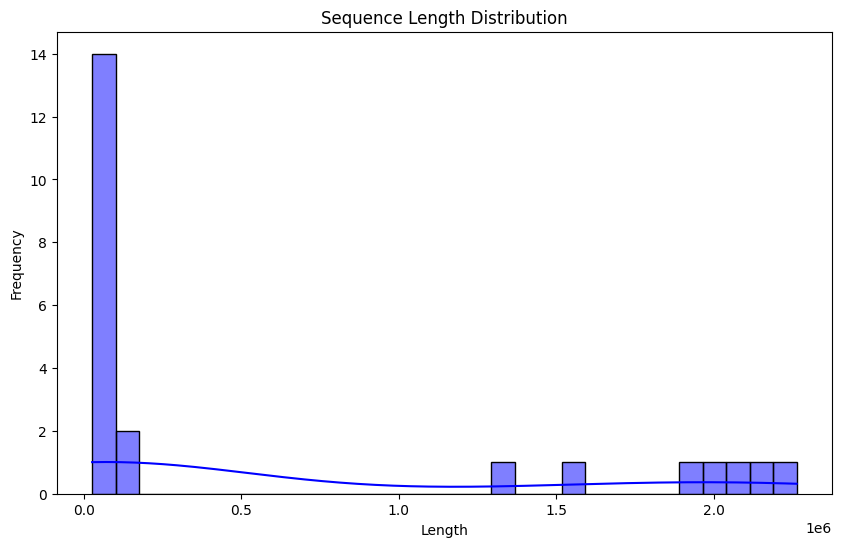

In [8]:
# Histogram of sequence lengths
plt.figure(figsize=(10, 6))
sns.histplot(sequence_lengths, bins=30, kde=True, color='blue')
plt.title("Sequence Length Distribution")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

- **1.3: GC Content**

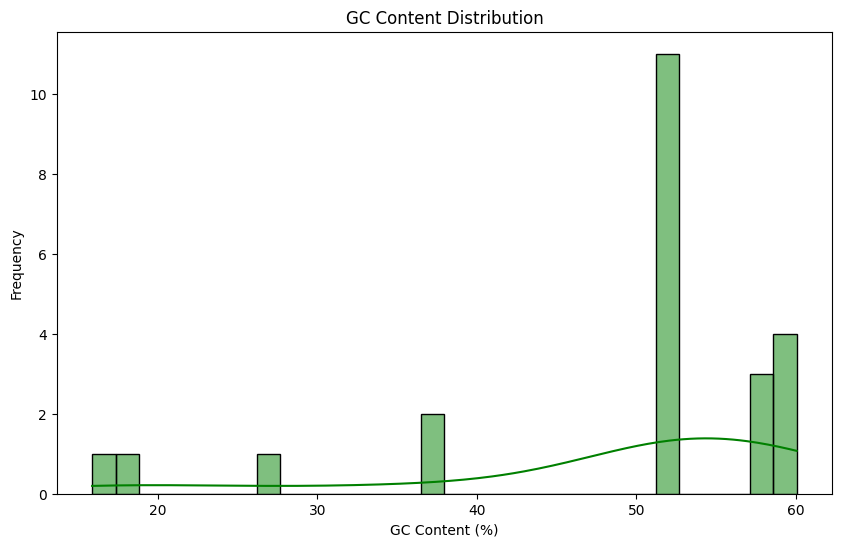

In [9]:
# Calculate GC content for each sequence
gc_content = [
    100 * (seq.count('G') + seq.count('C')) / len(seq) for seq in sequences.values()
]

# Histogram of GC content
plt.figure(figsize=(10, 6))
sns.histplot(gc_content, bins=30, kde=True, color='green')
plt.title("GC Content Distribution")
plt.xlabel("GC Content (%)")
plt.ylabel("Frequency")
plt.show()

- **1.4: Nucleotide Composition**

In [10]:
import collections

# Nucleotide counts across all sequences
nucleotide_counts = collections.Counter("".join(sequences.values()))
print("Nucleotide Counts:", nucleotide_counts)

Nucleotide Counts: Counter({'C': 4183080, 'G': 4164126, 'T': 2482674, 'A': 2473353, 'c': 362987, 'g': 358210, 't': 197926, 'a': 197143})


<ipython-input-11-c4f566609d4a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(nucleotide_counts.keys()), y=list(nucleotide_counts.values()), palette="viridis")


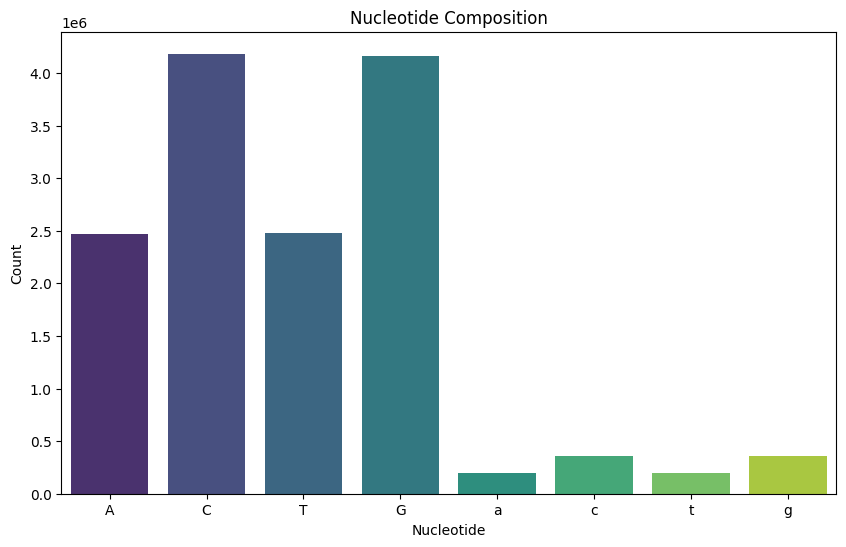

In [11]:
# Bar plot for nucleotide composition
plt.figure(figsize=(10, 6))
sns.barplot(x=list(nucleotide_counts.keys()), y=list(nucleotide_counts.values()), palette="viridis")
plt.title("Nucleotide Composition")
plt.xlabel("Nucleotide")
plt.ylabel("Count")
plt.show()

- **Analyzing the FASTA File in Python (Optional)**
Now that we have clarified these concepts, let’s outline a Python implementation to analyze a FASTA file. The steps include counting sequences, calculating lengths, computing GC content, and performing base counts and visualizations.

Number of sequences: 23


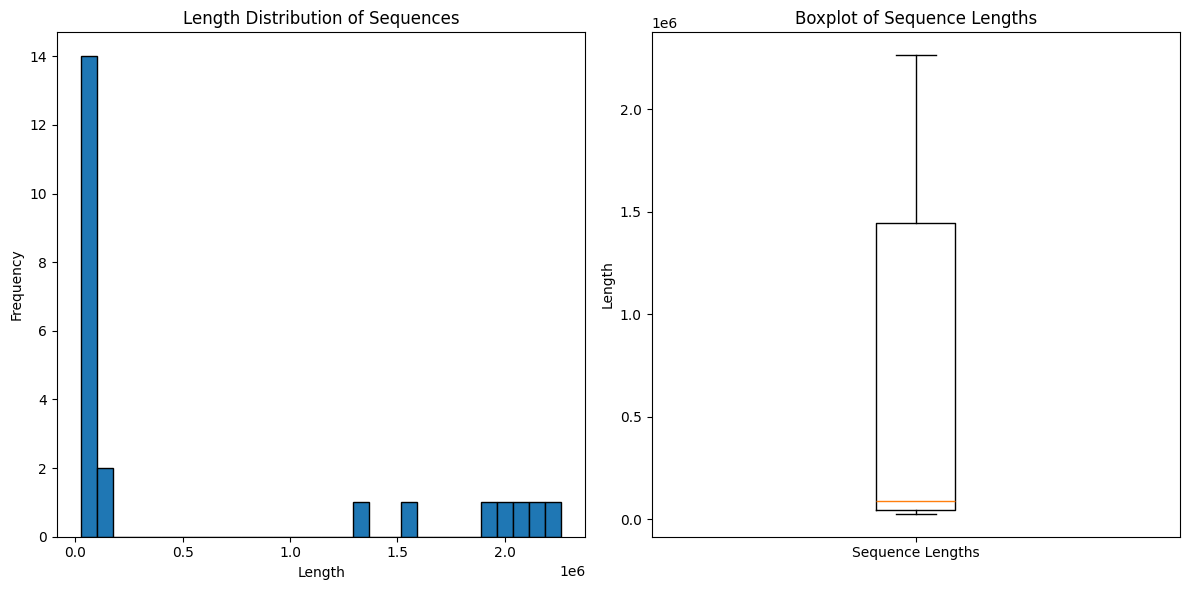

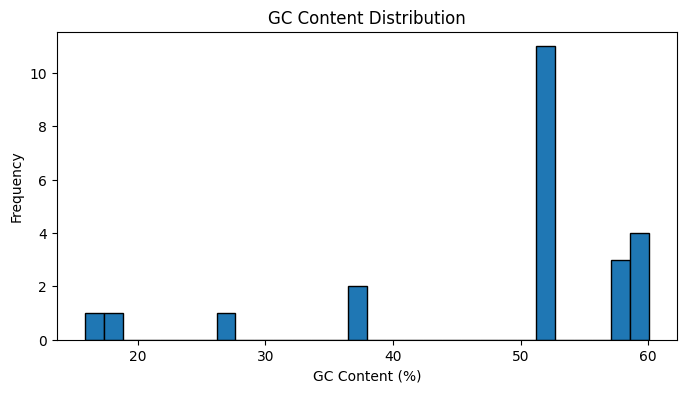

Base Counts:
A: 2473353
T: 2482674
G: 4164126
C: 4183080


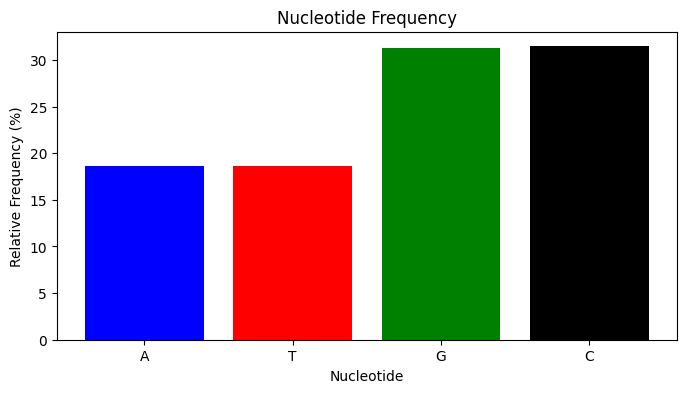

In [13]:
from Bio import SeqIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Analyzing the FASTA File
def analyze_fasta(file_path):
    sequences = {record.id: str(record.seq) for record in SeqIO.parse(file_path, "fasta")}

    # 1. Basic Statistics
    # Number of sequences
    num_sequences = len(sequences)
    print(f"Number of sequences: {num_sequences}")

    # Length distribution
    lengths = [len(seq) for seq in sequences.values()]

    # Visualize length distribution
    plt.figure(figsize=(12, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    plt.hist(lengths, bins=30, edgecolor='black')
    plt.title('Length Distribution of Sequences')
    plt.xlabel('Length')
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(1, 2, 2)
    plt.boxplot(lengths)
    plt.title('Boxplot of Sequence Lengths')
    plt.ylabel('Length')
    plt.xticks([1], ['Sequence Lengths'])  # Custom x-tick label

    plt.tight_layout()
    plt.show()

    # GC Content
    def calculate_gc_content(sequence):
        gc_count = sequence.count('G') + sequence.count('C')
        return (gc_count / len(sequence)) * 100

    gc_contents = [calculate_gc_content(seq) for seq in sequences.values()]

    # Visualize GC content
    plt.figure(figsize=(8, 4))
    plt.hist(gc_contents, bins=30, edgecolor='black')
    plt.title('GC Content Distribution')
    plt.xlabel('GC Content (%)')
    plt.ylabel('Frequency')
    plt.show()

    # 2. Sequence Composition
    # Base counts
    base_counts = {'A': 0, 'T': 0, 'G': 0, 'C': 0}
    for seq in sequences.values():
        for base in base_counts.keys():
            base_counts[base] += seq.count(base)

    print("Base Counts:")
    for base, count in base_counts.items():
        print(f"{base}: {count}")

    # Nucleotide frequency
    total_bases = sum(base_counts.values())
    relative_frequencies = {base: (count / total_bases) * 100 for base, count in base_counts.items()}

    # Visualize relative frequencies
    plt.figure(figsize=(8, 4))
    plt.bar(relative_frequencies.keys(), relative_frequencies.values(), color=['blue', 'red', 'green', 'black'])
    plt.title('Nucleotide Frequency')
    plt.xlabel('Nucleotide')
    plt.ylabel('Relative Frequency (%)')
    plt.show()

# Load and analyze your FASTA file
fasta_file_path = '/content/ergobibamus_cyprinoides_genome.fasta'
analyze_fasta(fasta_file_path)

## **Step 2: GFF3 Data Analysis**

- **2.1: Feature Type Distribution**

In [14]:
# Count unique feature types
feature_counts = gff_data['type'].value_counts()
print("Feature Type Counts:")
print(feature_counts)

Feature Type Counts:
type
exon             7403
CDS              7077
gene             6457
mRNA             6131
rRNA              520
tRNA              326
rDNA_repeat        27
tandem_repeat      14
telomere            7
Name: count, dtype: int64


<ipython-input-15-0d87a0cdca27>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=gff_data['type'], order=feature_counts.index, palette="viridis")


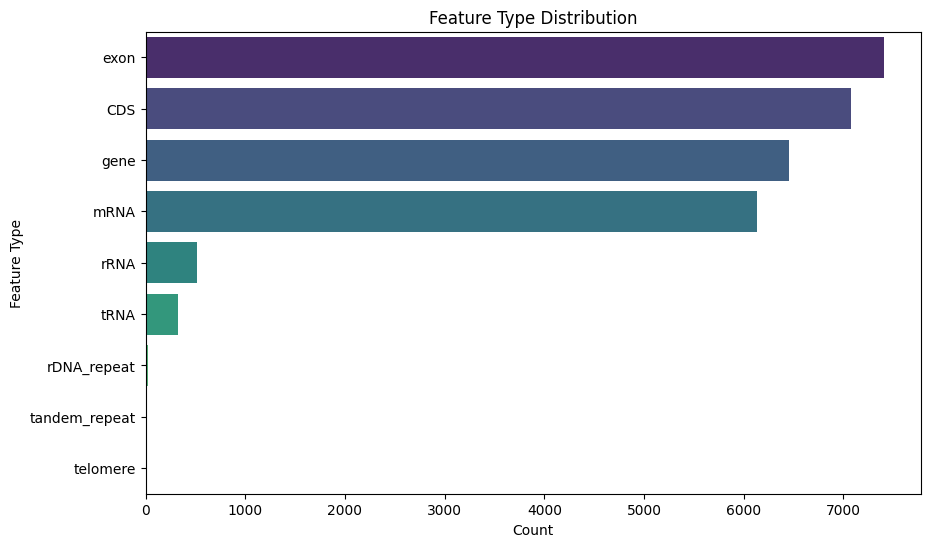

In [15]:
# Plot feature type distribution
plt.figure(figsize=(10, 6))
sns.countplot(y=gff_data['type'], order=feature_counts.index, palette="viridis")
plt.title("Feature Type Distribution")
plt.xlabel("Count")
plt.ylabel("Feature Type")
plt.show()

- **2.2: Feature Length Distribution**

In [16]:
# Add a column for feature lengths
gff_data['length'] = gff_data['end'] - gff_data['start'] + 1

# Summary statistics
print("Feature Length Statistics:")
print(gff_data['length'].describe())

Feature Length Statistics:
count     27962.000000
mean       1644.043130
std        3025.478722
min           2.000000
25%         471.000000
50%        1059.000000
75%        1998.000000
max      175723.000000
Name: length, dtype: float64


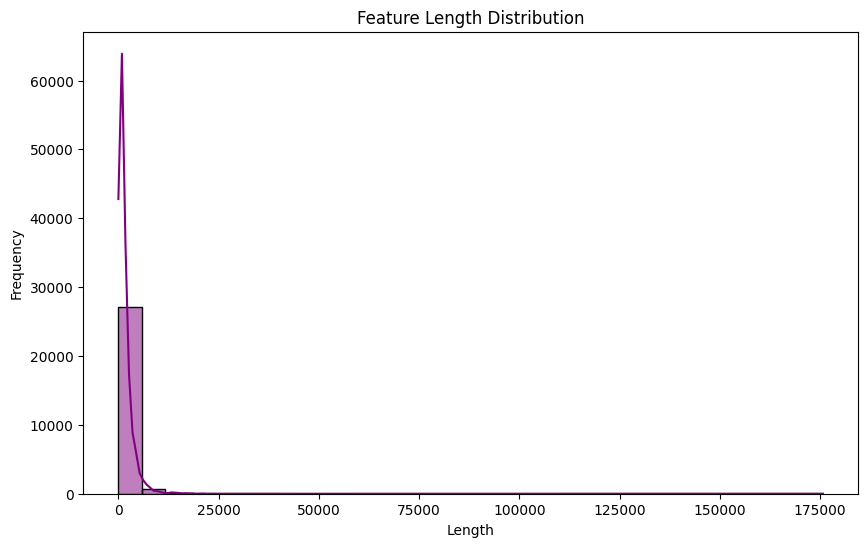

In [17]:
# Histogram of feature lengths
plt.figure(figsize=(10, 6))
sns.histplot(gff_data['length'], bins=30, kde=True, color='purple')
plt.title("Feature Length Distribution")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

- **2.3: Strand Distribution**

In [18]:
# Strand counts
strand_counts = gff_data['strand'].value_counts()
print("Strand Distribution:")
print(strand_counts)

Strand Distribution:
strand
-    14051
+    13911
Name: count, dtype: int64


<ipython-input-19-e2c6844a56dd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=gff_data['strand'], palette="pastel")


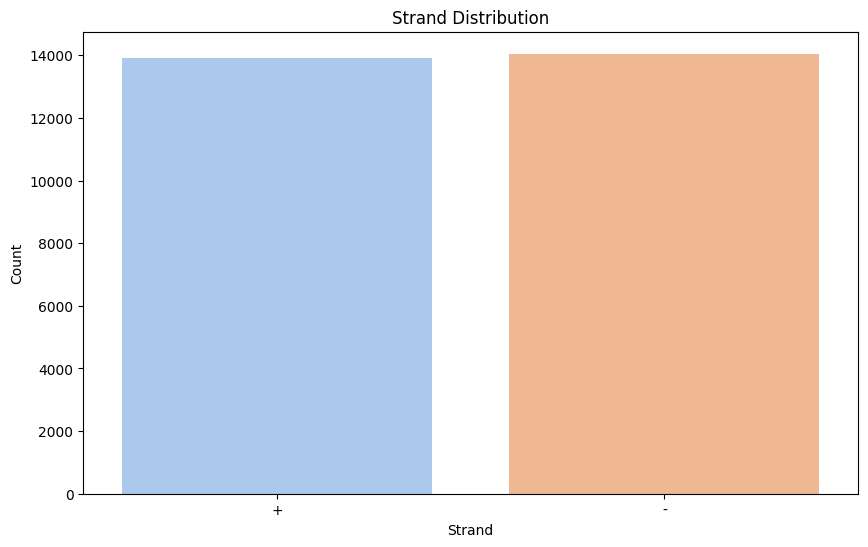

In [19]:
# Plot strand distribution
plt.figure(figsize=(10, 6))
sns.countplot(x=gff_data['strand'], palette="pastel")
plt.title("Strand Distribution")
plt.xlabel("Strand")
plt.ylabel("Count")
plt.show()

- **2.4: Attribute Parsing**

In [20]:
# Example: Extracting gene IDs from attributes (if present)
gff_data['gene_id'] = gff_data['attributes'].str.extract(r'ID=([^;]+)')
print("Extracted Gene IDs:")
print(gff_data['gene_id'].head())

Extracted Gene IDs:
0             PYV62_000001
1          PYV62_000001-T1
2    PYV62_000001-T1.exon1
3      PYV62_000001-T1.cds
4             PYV62_000002
Name: gene_id, dtype: object


## **Step 3: Linking FASTA and GFF3 Data**

- **3.1: Mapping Annotations to Sequences**

In [21]:
# Check if all GFF3 seqids are in FASTA sequences
gff_seqids = set(gff_data['seqid'])
fasta_seqids = set(sequences.keys())

missing_seqids = gff_seqids - fasta_seqids
print(f"Number of GFF3 seqids not found in FASTA: {len(missing_seqids)}")
if missing_seqids:
    print("Missing seqids:", missing_seqids)

Number of GFF3 seqids not found in FASTA: 0


- **3.2: Feature Density**

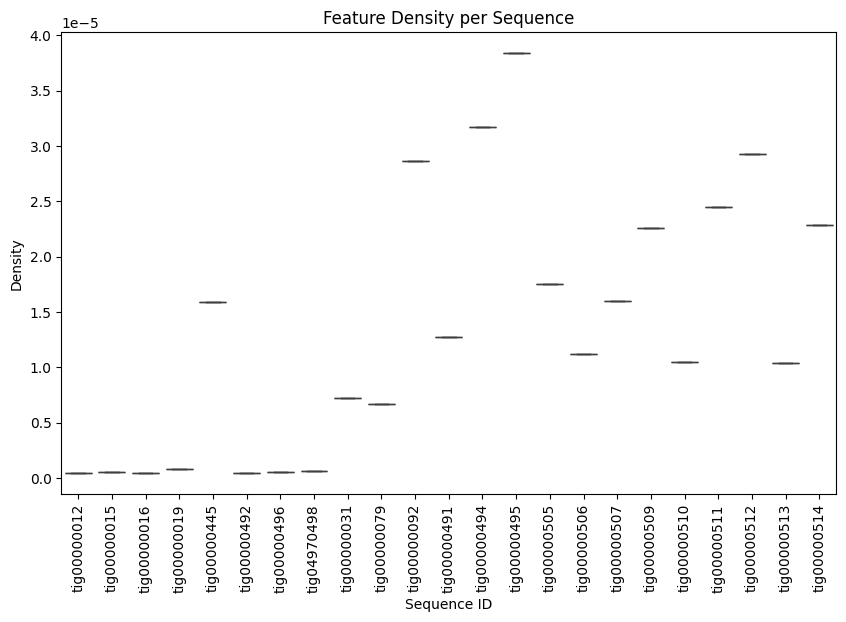

In [22]:
# Calculate density (features per unit length)
sequence_lengths_dict = {seq_id: len(seq) for seq_id, seq in sequences.items()}
gff_data['seq_length'] = gff_data['seqid'].map(sequence_lengths_dict)
gff_data['density'] = 1 / gff_data['seq_length']

# Density plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=gff_data, x='seqid', y='density')
plt.title("Feature Density per Sequence")
plt.xlabel("Sequence ID")
plt.ylabel("Density")
plt.xticks(rotation=90)
plt.show()

### **3.3: Coverage Analysis (Optional - for more info)**

**Description of the Coverage Analysis Data**  
The coverage analysis computes the proportion of each genomic sequence that is covered by annotated features in a GFF (General Feature Format) file. The analysis proceeds as follows:

1. **Calculating Covered Length**: For each feature in the GFF data, the covered length is determined by subtracting the start position from the end position and adding one (to account for inclusive counting).

2. **Grouping by Sequence ID**: The total covered length for each sequence (`seqid`) is calculated by summing the covered lengths of all features mapped to that sequence.

3. **Calculating Coverage**: The coverage for each sequence is computed as the total covered length divided by the total length of the sequence (retrieved from the first entry in the grouped data). This gives a measure of how much of each sequence is annotated or covered by the features.

4. **Output**: The resulting coverage values indicate the fraction of each genomic sequence that is covered by the features, which can help evaluate the completeness of the genome annotations.

This analysis is crucial for understanding how comprehensively features such as genes, regulatory regions, and other elements are annotated within the genome, which can have implications for further biological and functional studies.


In [23]:
# Coverage analysis
gff_data['covered_length'] = gff_data['end'] - gff_data['start'] + 1
coverage = gff_data.groupby('seqid')['covered_length'].sum() / gff_data.groupby('seqid')['seq_length'].first()
print("Coverage per Sequence:")
print(coverage)

Coverage per Sequence:
seqid
tig00000012    3.197801
tig00000015    3.350374
tig00000016    3.455358
tig00000019    3.294595
tig00000031    1.448106
tig00000079    1.471085
tig00000092    0.459133
tig00000445    1.173310
tig00000491    1.086623
tig00000492    3.458439
tig00000494    1.382859
tig00000495    1.444905
tig00000496    3.346463
tig00000505    1.449619
tig00000506    1.430527
tig00000507    1.423391
tig00000509    0.727466
tig00000510    1.418097
tig00000511    1.437671
tig00000512    1.410184
tig00000513    1.443356
tig00000514    0.432105
tig04970498    3.261689
dtype: float64


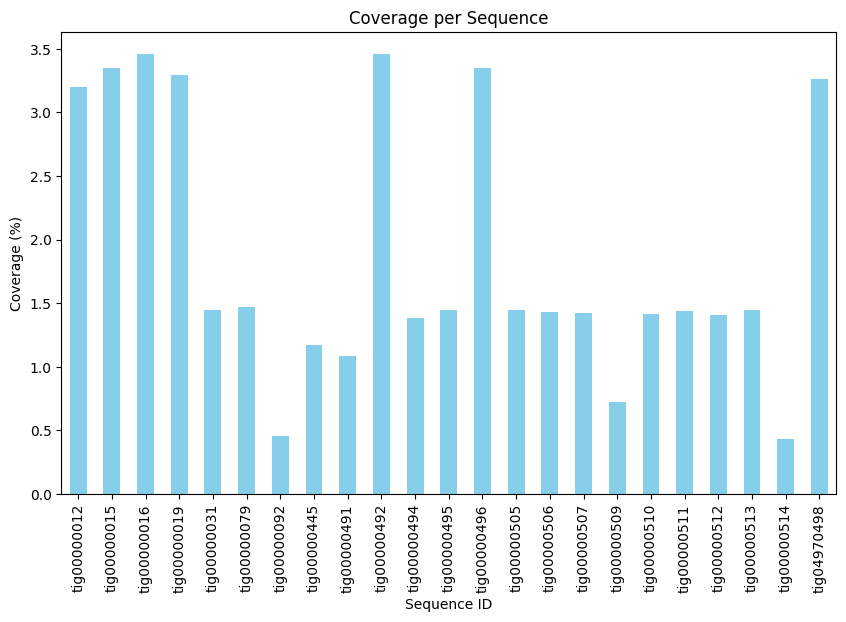

In [24]:
# Bar plot of coverage
coverage.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title("Coverage per Sequence")
plt.xlabel("Sequence ID")
plt.ylabel("Coverage (%)")
plt.show()

# Performing NLP Tasks with Hugging Face Transformers
Once you have the genomic sequences and annotations, you can create NLP tasks. Here's how you can use a transformer model to generate embeddings from these sequences:

In [25]:
from transformers import AutoTokenizer, AutoModel
import torch

# Step 4: Load a pre-trained tokenizer and model
model_name = 'bert-base-uncased'  # You can choose other models as needed
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# Step 5: Tokenize the sequences and get embeddings
def get_embeddings(sequences):
    embeddings = {}
    for seq_id, seq in sequences.items():
        inputs = tokenizer(seq, return_tensors='pt', truncation=True, padding=True, max_length=512)
        with torch.no_grad():  # Disable gradient tracking
            outputs = model(**inputs)
        embeddings[seq_id] = outputs.last_hidden_state.mean(dim=1)  # Mean pooling
    return embeddings

# Get embeddings
embeddings = get_embeddings(sequences)

# Check embeddings for the first sequence
first_seq_id = list(embeddings.keys())[0]
print(f"Embeddings for {first_seq_id}:\n{embeddings[first_seq_id]}")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Embeddings for tig00000012:
tensor([[-4.0278e-01,  1.4600e-01, -3.7918e-01, -2.7795e-01, -1.5144e-01,
         -2.9255e-01,  7.2880e-01,  9.9745e-02,  1.6817e-02, -9.4118e-02,
         -3.1044e-01, -4.0408e-01,  1.4134e-01, -1.9316e-01, -4.7621e-02,
         -3.9403e-01,  2.1126e-01,  4.7684e-02,  5.7012e-01,  5.5258e-01,
          2.0565e-01, -3.3887e-02, -1.5850e-02,  3.0116e-02,  9.0317e-02,
          4.0238e-01, -2.8162e-01, -8.1548e-02, -7.6296e-02, -1.3371e-01,
          4.4863e-02, -7.1750e-02, -3.5258e-01,  2.2080e-01,  1.0965e-01,
         -2.0380e-01, -5.4538e-02, -2.0297e-01, -2.8625e-01,  1.9026e-01,
         -5.6892e-02, -2.3356e-01,  1.7690e-02, -3.9292e-02, -7.8347e-02,
         -5.4823e-01, -3.1011e-01, -1.8435e-01, -3.2670e-01,  1.0566e-01,
         -2.5155e-01,  2.5425e-01,  2.6619e-01, -7.5395e-02, -4.8312e-01,
          3.9686e-01,  3.7653e-01,  1.1392e-01, -4.5805e-02, -1.1590e-01,
         -9.5725e-02, -1.8392e-01, -2.9716e-01, -6.9181e-02,  2.2737e-01,
          

# Explanation of the Code
- **Read FASTA File**: The code uses Biopython's SeqIO to read the FASTA file and store sequences in a dictionary.
- **Read GFF3 File**: The GFF3 file is read using pandas, and it is structured into a DataFrame for easier data manipulation.
- **Load Transformer Model**: A pre-trained transformer model (like BERT) is loaded using the Hugging Face library.
- **Get Embeddings**: Each sequence is tokenized and passed through the model to obtain the embeddings. The example uses mean pooling on the output hidden states.
**Next Steps**
Integrate the embeddings into your NLP tasks, such as semantic similarity, classification, or clustering based on genomic data. If you need assistance with specific tasks or further processing, feel free to ask!